In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import pandas as pd
import math
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
from PIL import Image, ImageOps
import xml.etree.ElementTree as ET
import random

In [2]:
parent_dir1 = 'DATAMINING\\DMimages\\'
image_data = []
for sub_dir1 in os.listdir(parent_dir1):
    subdir_path1 = os.path.join(parent_dir1, sub_dir1)
    
    if os.path.isdir(subdir_path1):
        for filename in os.listdir(subdir_path1):
            if filename.endswith('.jpg'):
                image_path = os.path.join(subdir_path1, filename)
                image = Image.open(image_path)
                image_data.append({'subdirectory': sub_dir1, 'filename': filename, 'image': image})

parent_dir2 = 'DATAMINING\\DMannotations\\'
annotation_data = []
for sub_dir2 in os.listdir(parent_dir2):
    subdir_path2 = os.path.join(parent_dir2, sub_dir2)

    if os.path.isdir(subdir_path2):
        annot_content = os.listdir(subdir_path2)
        annotation_data.append({'subdirectory': sub_dir2, 'contents': annot_content})

References:1.https://realpython.com/working-with-files-in-python/
           2.https://docs.python.org/3/library/os.html#os.environ
           3.https://pillow.readthedocs.io/en/stable/

In [3]:
output_dir = 'DATAMINING\\DMresizedimages\\' 
os.makedirs(output_dir, exist_ok=True)
target_size = (100, 100)
for sub_dir1 in os.listdir(parent_dir1):
    subdir_path1 = os.path.join(parent_dir1, sub_dir1)
    
    if os.path.isdir(subdir_path1):
        for filename in os.listdir(subdir_path1):
            if filename.endswith('.jpg'):
                image_path = os.path.join(subdir_path1, filename)
                image = Image.open(image_path)
                resized_image = image.resize(target_size)
                output_image_path = os.path.join(output_dir, f'{sub_dir1}_{filename}')
                resized_image.save(output_image_path)
                image_data.append({'subdirectory': sub_dir1, 'filename': filename, 'image': resized_image})                

(b) Histogram Equalization (Image Intensity Normalization)


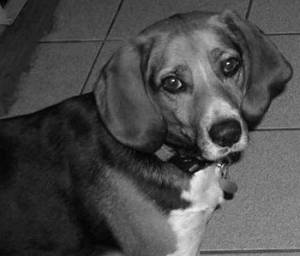

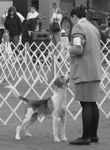

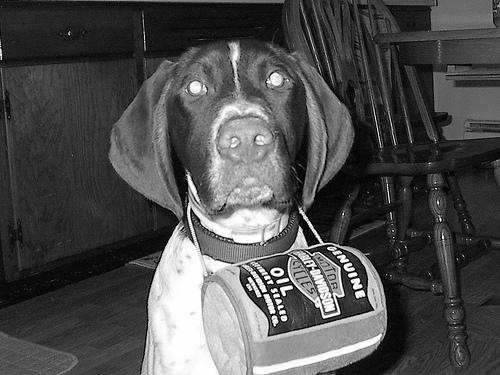

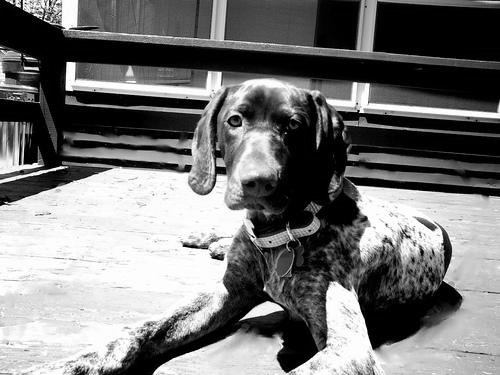

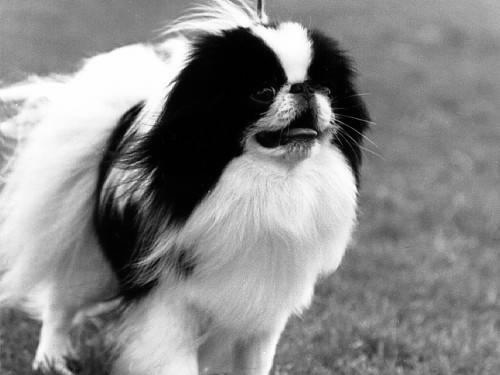

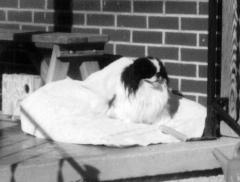

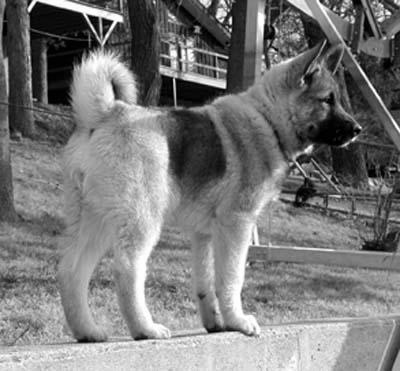

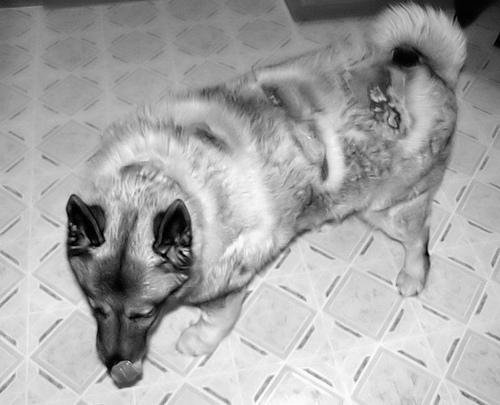

In [4]:
selected_images_grayscale = {}
for sub_dir1 in os.listdir(parent_dir1):
    subdir_path1 = os.path.join(parent_dir1, sub_dir1)
    if os.path.isdir(subdir_path1):
        selected_images_grayscale[sub_dir1] = []
        image_count = 0
        for filename in os.listdir(subdir_path1):
            if filename.endswith('.jpg') and image_count < 2:
                image_path = os.path.join(subdir_path1, filename)
                image = Image.open(image_path)
                grayscale_image = image.convert('L')
                selected_images_grayscale[sub_dir1].append({'filename': filename, 'image': grayscale_image})
                image_count += 1
from IPython.display import display
for class_name, images in selected_images_grayscale.items():
    for item in images:
        display(item['image'])

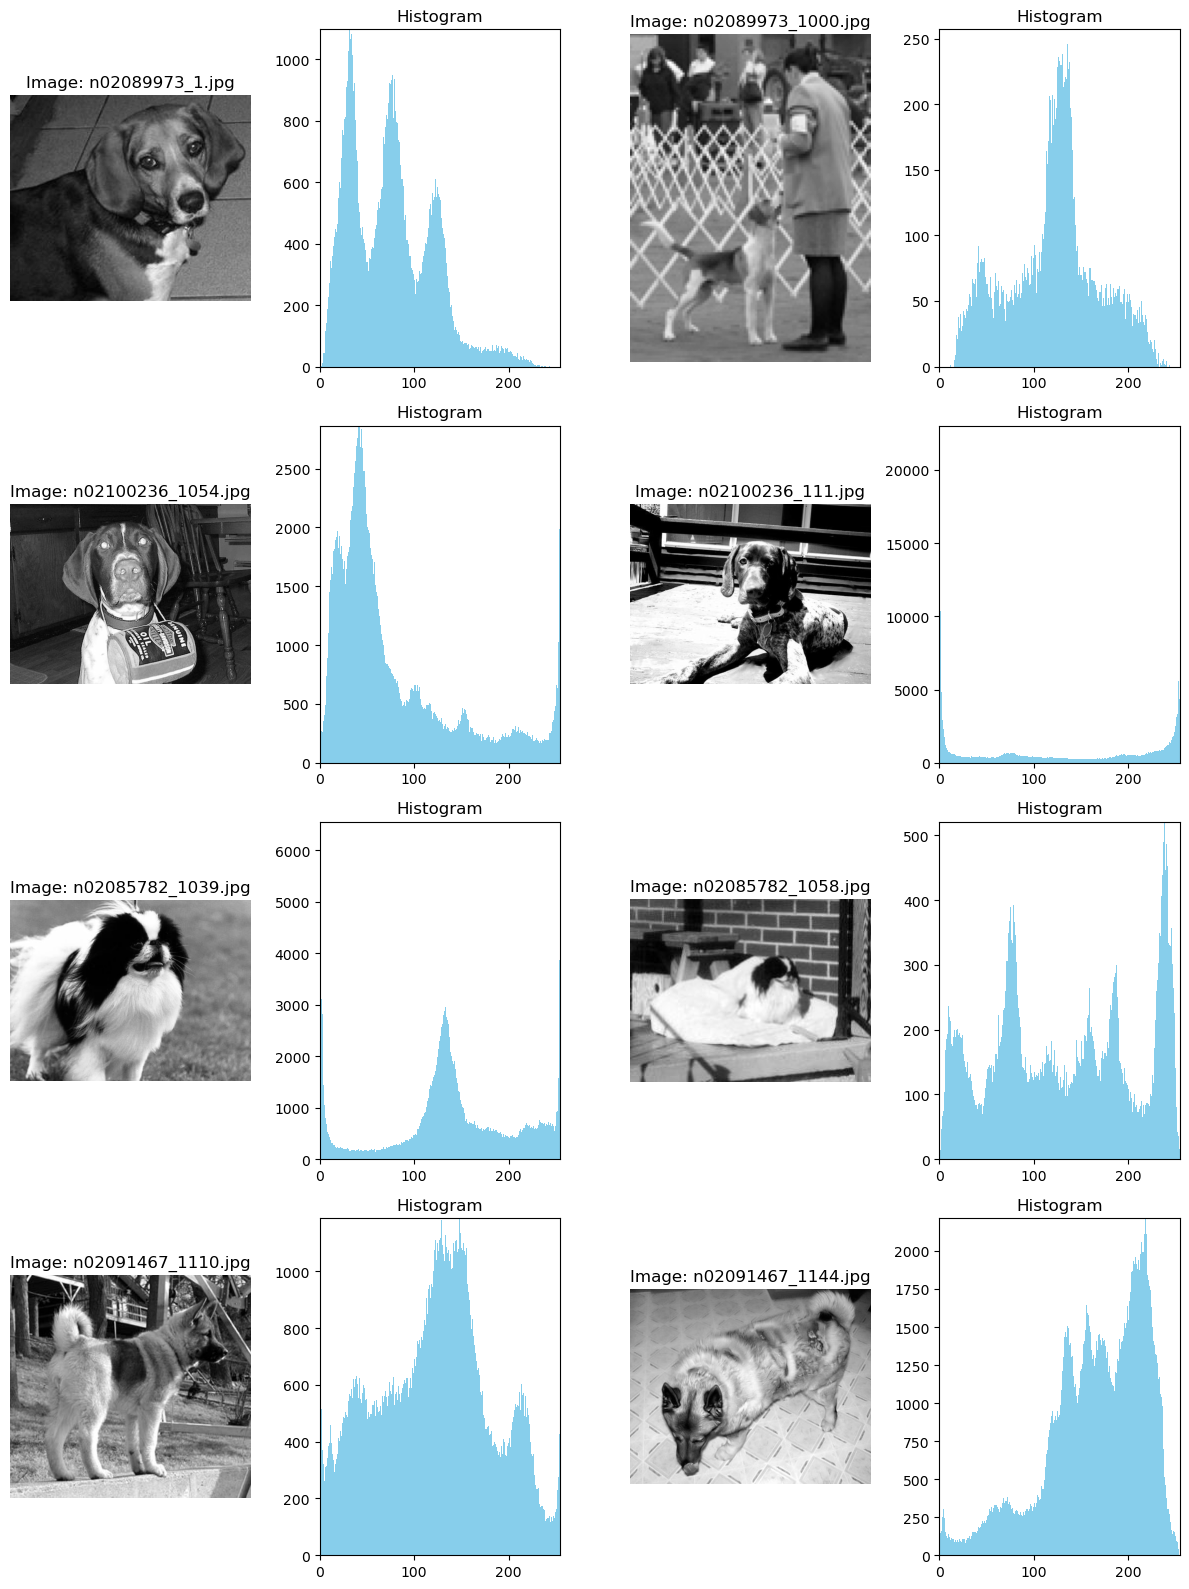

In [5]:
num_classes = len(selected_images_grayscale)
fig, axes = plt.subplots(num_classes, 4, figsize=(12, 4 * num_classes))

for i, (class_name, images) in enumerate(selected_images_grayscale.items()):
    for j, item in enumerate(images):
        ax1 = axes[i, j * 2]
        ax1.imshow(item['image'], cmap='gray')
        ax1.set_title(f'Image: {item["filename"]}')
        ax1.axis('off')
        hist, bins = np.histogram(np.array(item['image']).ravel(), bins=256, range=(0, 256))
        ax2 = axes[i, j * 2 + 1]
        ax2.bar(bins[:-1], hist, width=1.0, color='skyblue')
        ax2.set_ylim([0, max(hist)])
        ax2.set_xlim([0, 255])
        ax2.set_title('Histogram')
plt.tight_layout()
plt.show()

References:1.https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
           2.https://matplotlib.org/stable/api/pyplot_summary.html
           3.https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

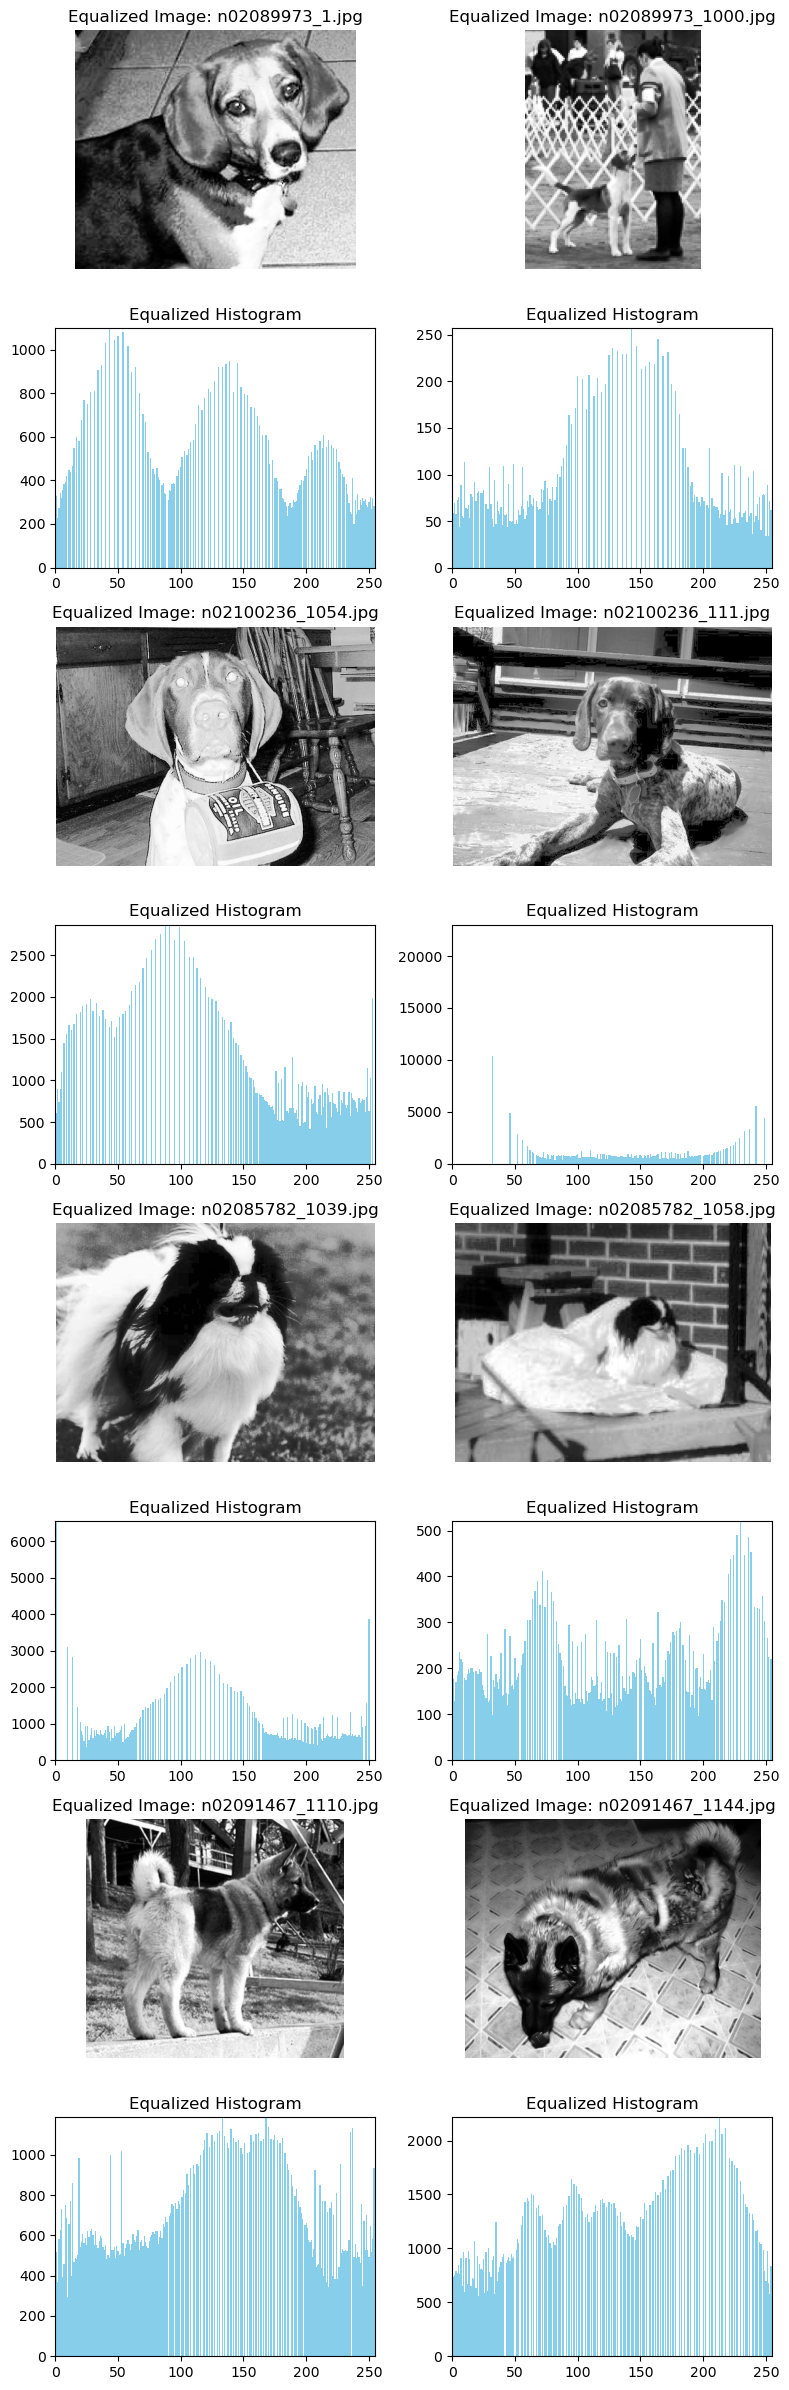

In [6]:
num_classes = len(selected_images_grayscale)
fig, axes = plt.subplots(num_classes * 2, 2, figsize=(8, 6 * num_classes))

for i, (class_name, images) in enumerate(selected_images_grayscale.items()):
    for j, item in enumerate(images):
       
        equalized_image = ImageOps.equalize(item['image'])
        ax1 = axes[i * 2, j]
        ax1.imshow(equalized_image, cmap='gray')
        ax1.set_title(f'Equalized Image: {item["filename"]}')
        ax1.axis('off')
        hist, bins = np.histogram(np.array(equalized_image).ravel(), bins=256, range=(0, 256))
        ax2 = axes[i * 2 + 1, j]
        ax2.bar(bins[:-1], hist, width=1.0, color='skyblue')
        ax2.set_ylim([0, max(hist)])
        ax2.set_xlim([0, 255])
        ax2.set_title('Equalized Histogram')
plt.tight_layout()
plt.show()

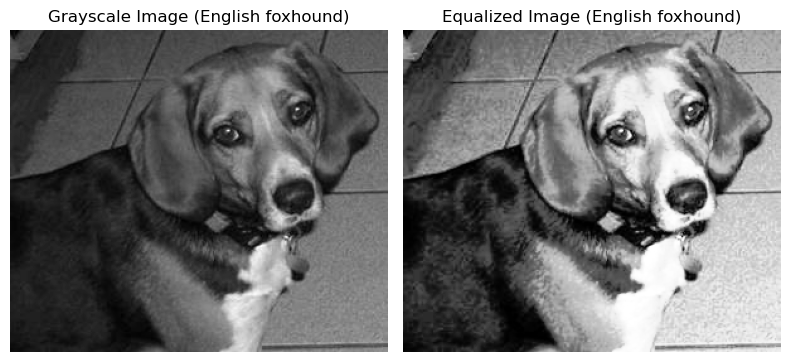

In [7]:
selected_images = []
for sub_dir1 in os.listdir(parent_dir1):
    subdir_path1 = os.path.join(parent_dir1, sub_dir1)
    if os.path.isdir(subdir_path1):
        image_count = 0
        for filename in os.listdir(subdir_path1):
            if filename.endswith('.jpg') and image_count < 1:  
                image_path = os.path.join(subdir_path1, filename)
                image = Image.open(image_path)
                grayscale_image = ImageOps.grayscale(image)
                equalized_image = ImageOps.equalize(grayscale_image)
                selected_images.append({'class': sub_dir1, 'grayscale': grayscale_image, 'equalized': equalized_image})
                image_count += 1
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sample_image = selected_images[0]
axes[0].imshow(sample_image['grayscale'], cmap='gray')
axes[0].set_title(f'Grayscale Image ({sample_image["class"]})')
axes[0].axis('off')
axes[1].imshow(sample_image['equalized'], cmap='gray')
axes[1].set_title(f'Equalized Image ({sample_image["class"]})')
axes[1].axis('off')
plt.tight_layout()
plt.show()

Grayscale image has poor contrast, while equalized image has enhanced contrast,resulting to improved visibility of details and features within the image.

c) RGB histogram

In [25]:
selected_names = []
for sub_dir1 in os.listdir(parent_dir1):
    subdir_path1 = os.path.join(parent_dir1, sub_dir1)
    if os.path.isdir(subdir_path1):
        image_count = 0
        for filename in os.listdir(subdir_path1):
            if filename.endswith('.jpg') and image_count < 1: 
                selected_names.append({'class': sub_dir1, 'filename': filename})
                image_count += 1
for image_info in selected_names:
    print(filename)

n02091467_92.jpg
n02091467_92.jpg
n02091467_92.jpg
n02091467_92.jpg


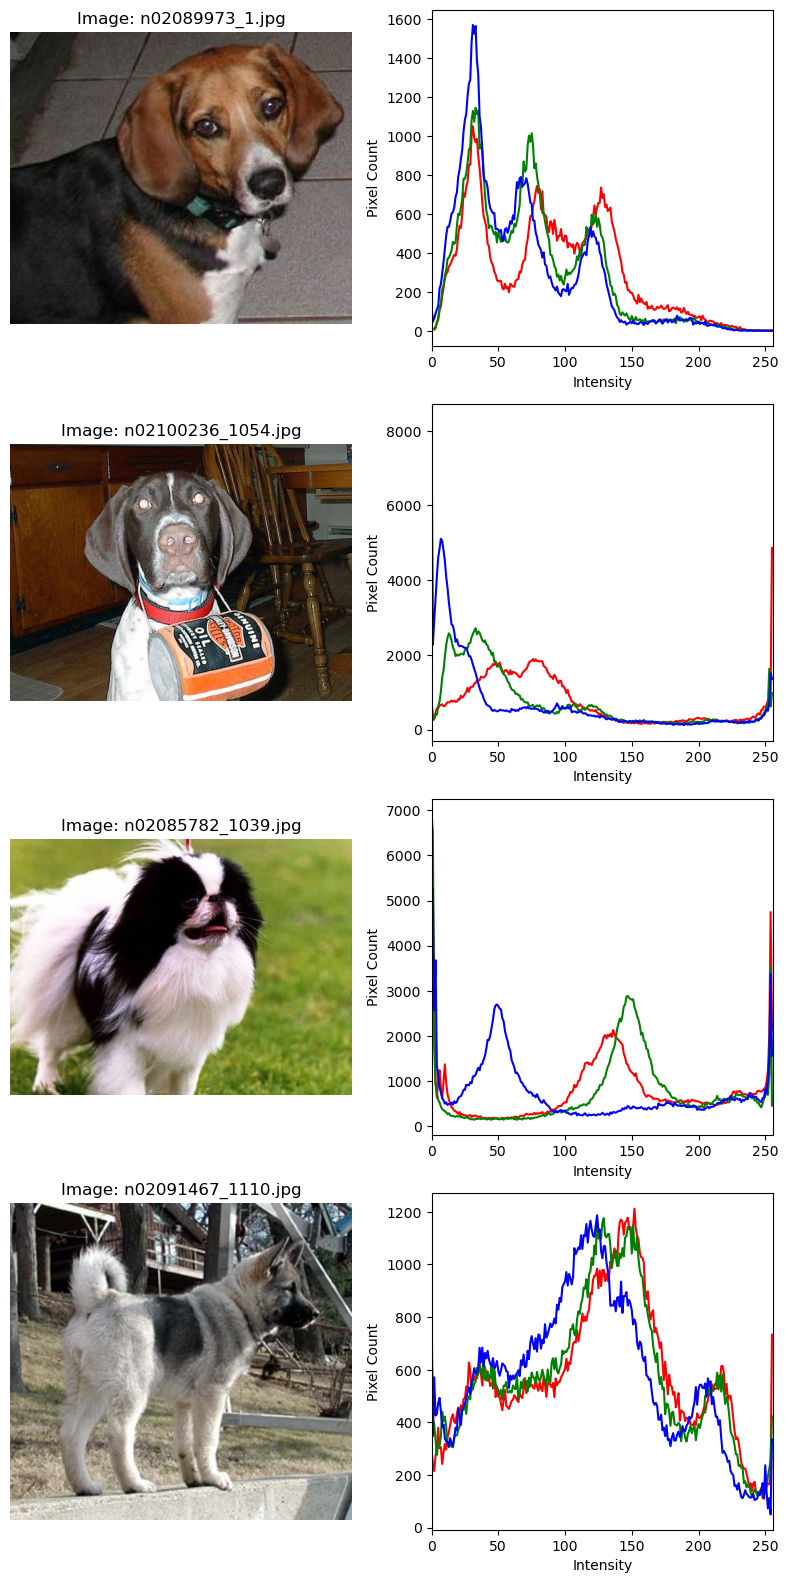

In [26]:
fig, axes = plt.subplots(len(selected_names), 2, figsize=(8, 4 * len(selected_names)))

for i, image_info in enumerate(selected_names):
    image_path = os.path.join(parent_dir1, image_info['class'], image_info['filename'])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image: {image_info["filename"]}')
    axes[i, 0].axis('off')
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    axes[i, 1].plot(hist_r, color='red')
    axes[i, 1].plot(hist_g, color='green')
    axes[i, 1].plot(hist_b, color='blue')
    axes[i, 1].set_xlim([0, 256])
    axes[i, 1].set_xlabel('Intensity')
    axes[i, 1].set_ylabel('Pixel Count')

plt.tight_layout()
plt.show()

References:1.https://pillow.readthedocs.io/en/stable/index.html
           2.https://matplotlib.org/stable/
           3.https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga7dfb72c9cf9780a347fbe3d1c47e5d5a
           4.https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
           5.https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html

d) Histogram Comparison (Measures of Similarity and Dissimilarity)

In [24]:
sub = [os.path.join(parent_dir1, d) for d in os.listdir(parent_dir1) if os.path.isdir(os.path.join(parent_dir1, d))]
first_dir = sub[0]
second_dir = sub[1]
first_dir_files = os.listdir(first_dir)
second_dir_files = os.listdir(second_dir)
images1 = [f for f in first_dir_files if f.lower().endswith('.jpg')]
images = [f for f in second_dir_files if f.lower().endswith('.jpg')]
selected_images_first = random.sample(images1, 2)
selected_image_second = random.choice(images)
selected_images_first,selected_image_second

(['n02089973_3089.jpg', 'n02089973_48.jpg'], 'n02100236_2204.jpg')

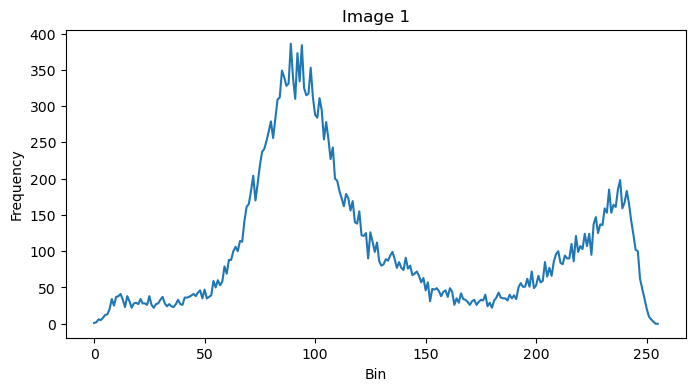

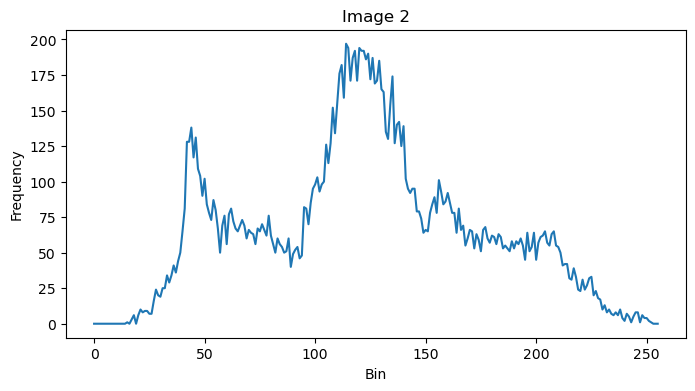

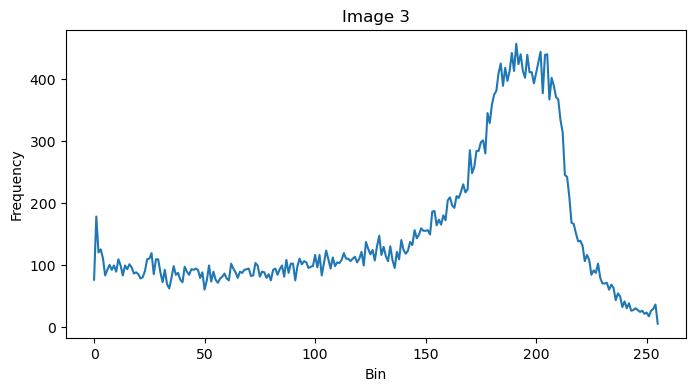

In [14]:
gray_images = []
for image_file in selected_images_first + [selected_image_second]:
    image_path = os.path.join(first_sub_dir, image_file) if image_file in selected_images_first else os.path.join(second_sub_dir, image_file)
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray_image)
histograms = [cv2.calcHist([gray_image], [0], None, [256], [0, 256]) for gray_image in gray_images]
vector= [histogram.flatten() for histogram in histograms]
for i, histogram in enumerate(vector):
    plt.figure(figsize=(8, 4))
    plt.title(f'Image {i + 1}')
    plt.plot(histogram)
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.show()

In [17]:
euclidean_distance_same = np.linalg.norm(vector[0] - vector[1])
euclidean_distance_diff = np.linalg.norm(vector[0] - vector[2])
euclidean_distance_diff = np.linalg.norm(vector[1] - vector[2])
manhattan_distance_same = np.sum(np.abs(vector[0] - vector[1]))
manhattan_distance_diff= np.sum(np.abs(vector[0] - vector[2]))
manhattan_distance_diff= np.sum(np.abs(vector[1] - vector[2]))
hist1_normalized = vector[0] / np.sum(vector[0])
hist2_normalized = vector[1] / np.sum(vector[1])
bhattacharyya_distance_same = -np.log(np.sum(np.sqrt(hist1_normalized * hist2_normalized)))
hist1_normalized = vector[0] / np.sum(vector[0])
hist3_normalized = vector[2] / np.sum(vector[2])
bhattacharyya_distance_diff = -np.log(np.sum(np.sqrt(hist1_normalized * hist3_normalized)))
hist2_normalized = vector[1] / np.sum(vector[1])
bhattacharyya_distance_diff = -np.log(np.sum(np.sqrt(hist2_normalized * hist3_normalized)))
intersection_same= np.minimum(vector[0], vector[1])
intersection_score_same = np.sum(intersection_same)
intersection_diff = np.minimum(vector[0], vector[2])
intersection_score_diff= np.sum(intersection_diff)
intersection_diff= np.minimum(vector[1], vector[2])
intersection_score_diff = np.sum(intersection_diff)

print("Histogram Comparison for same class")
print("Euclidean Distance:", euclidean_distance_same)
print("Manhattan Distance:", manhattan_distance_same)
print("Bhattacharyya Distance:", bhattacharyya_distance_same)
print("Histogram Intersection:", intersection_score_same)

print("\nHistogram Comparison for different class")
print("Euclidean Distance :", euclidean_distance_diff)
print("Manhattan Distance :", manhattan_distance_diff)
print("Bhattacharyya Distance:", bhattacharyya_distance_diff)
print("Histogram Intersection:", intersection_score_diff)

print("\nHistogram Comparison for different class")
print("Euclidean Distance: ", euclidean_distance_diff)
print("Manhattan Distance :", manhattan_distance_diff)
print("Bhattacharyya Distance:", bhattacharyya_distance_diff)
print("Histogram Intersection:", intersection_score_diff)

Histogram Comparison for same class
Euclidean Distance: 1644.7242
Manhattan Distance: 17796.0
Bhattacharyya Distance: 0.13584319
Histogram Intersection: 12599.0

Histogram Comparison for different class
Euclidean Distance : 2362.4856
Manhattan Distance : 25892.0
Bhattacharyya Distance: 0.13072038
Histogram Intersection: 14587.0

Histogram Comparison for different class
Euclidean Distance:  2362.4856
Manhattan Distance : 25892.0
Bhattacharyya Distance: 0.13072038
Histogram Intersection: 14587.0


References:1.https://numpy.org/doc/stable/
2.https://docs.python.org/3/
3.https://docs.opencv.org/4.x/
4.https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

e) Image Feature Descriptor: ORB (Oriented FAST and Rotated BRIEF)

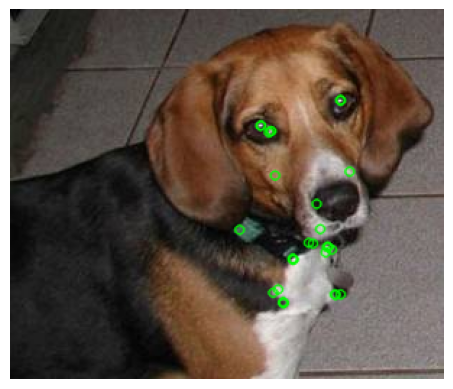

In [18]:
class_dir = 'DATAMINING\\DMimages\\English foxhound\\'
class_img_files = os.listdir(class_dir)
if not class_img_files:
    print(f"No images found in {class_dir}")
    exit(1)
img_file = class_img_files[0]
img_path = os.path.join(class_dir, img_file)
edge_threshold = 30
patch_size = 30
n_levels = 8
fast_threshold = 20
scale_factor = 1.2
wta_k = 2
score_type = cv2.ORB_HARRIS_SCORE
first_level = 0
n_features = 30

orb = cv2.ORB_create(
    edgeThreshold=edge_threshold,
    patchSize=patch_size,
    nlevels=n_levels,
    fastThreshold=fast_threshold,
    scaleFactor=scale_factor,
    WTA_K=wta_k,
    scoreType=score_type,
    firstLevel=first_level,
    nfeatures=n_features
)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
kp = orb.detect(img, None)
img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

References:1.https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html,  2.https://docs.opencv.org/4.x/d4/d5d/group__features2d__draw.html#gaf11a18f308cb74975fe50e2e5569bf18
        

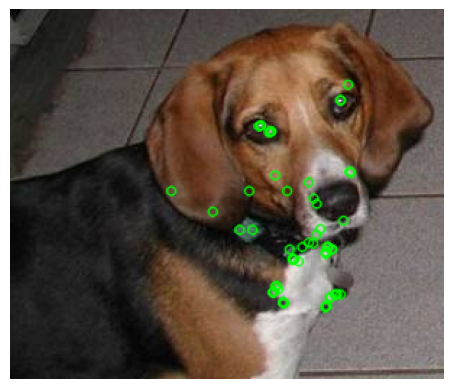

Number of keypoints extracted: 61
Edge threshold value: 30
Patch size: 30


In [19]:
class_dir = 'DATAMINING\\DMimages\\English foxhound\\'
class_img_files = os.listdir(class_dir)
if not class_img_files:
    print(f"No images found in {class_dir}")
    exit(1)
img_file = class_img_files[0]
img_path = os.path.join(class_dir, img_file)
n_features_min = 25  
n_features_max = 75  
edge_threshold = 30
patch_size = 30  
n_levels = 8
fast_threshold = 20
scale_factor = 1.2
wta_k = 2
score_type = cv2.ORB_HARRIS_SCORE
first_level = 0
n_features = max(n_features_min, min(n_features_max, n_features_min + n_features_max // 2))
orb = cv2.ORB_create(
    edgeThreshold=edge_threshold,
    patchSize=patch_size,
    nlevels=n_levels,
    fastThreshold=fast_threshold,
    scaleFactor=scale_factor,
    WTA_K=wta_k,
    scoreType=score_type,
    firstLevel=first_level,
    nfeatures=n_features
)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
kp = orb.detect(img, None)
img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(f"Number of keypoints extracted: {len(kp)}")
print(f"Edge threshold value: {edge_threshold}")
print(f"Patch size: {patch_size}")

References:https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html

f) Dimensionality reduction (using Principal Component Analysis, PCA)

In [20]:
image_dirs = [
    'DATAMINING\\DMimages\\English foxhound\\',
    'DATAMINING\\DMimages\\Norwegian elkhound\\']
files_dt= []
for image_dir in image_dirs:
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):  
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            hist = cv2.calcHist([image], [0], None, [256], [0, 256])
            hist = hist / hist.sum()
            hist = hist.ravel()
            files_dt.append(hist)

In [21]:
files_dt = np.array(files_dt)
print( files_dt.shape)
pca = PCA(n_components=2)
files_dt_pca = pca.fit_transform(files_dt)
print(files_dt_pca.shape)

(353, 256)
(353, 2)


References:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

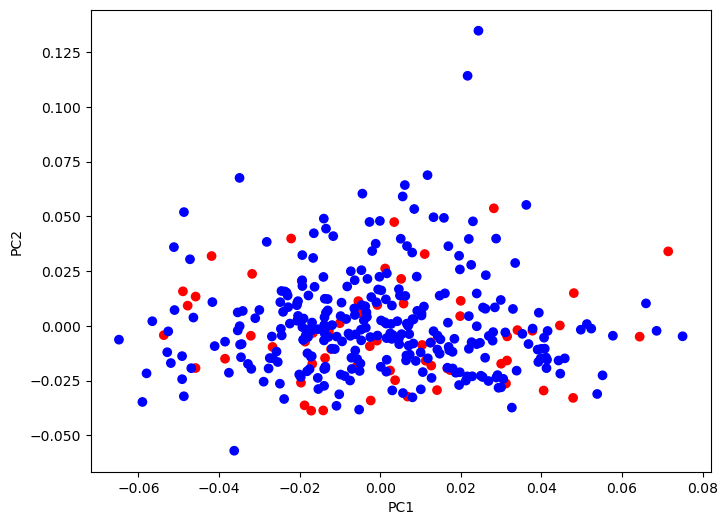

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(files_dt_pca[:, 0], files_dt_pca[:, 1], c=['r' if i < len(image_dirs[0]) else 'b' for i in range(files_dt_pca.shape[0])])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

References:https://matplotlib.org/stable/users/index.html